In [1]:
# Importing Basic Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
# Reading the dataset
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Splitting the dataset and converting into array

X = dataset.iloc[: , 3:13].values   # from CreditScore to Estimated Salary
y = dataset.iloc[:, 13].values      # only Exited

In [5]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [6]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [7]:
''' Now we need to do Label Encoding and One Hot Encoding '''

' Now we need to do Label Encoding and One Hot Encoding '

In [8]:
# First we will do Label Encoding in Gender Column
# For this we need to create a LabelEncoder

label_encoder = LabelEncoder()
X[:, 2] = label_encoder.fit_transform(X[:, 2])

# here female became 0 and male became 1

In [9]:
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [10]:
# now for countries we need to Label Encode and then Hot Encode ( for dummy variables )
# so we can use directly ColumnTransformer 

ct1 = ColumnTransformer(transformers=[('oh', OneHotEncoder(), [1])], remainder='passthrough')
X = ct1.fit_transform(X)

In [11]:
X     
#now to columns becomes['France', 'Germany', 'Spain', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
#                       'HasCrCard', 'IsActiveMember', 'Estimated Salary']

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [12]:
# but to avoid the dummy variable trap... let's remove the first column

In [13]:
X = X[:, 1:]

In [14]:
X
#now to columns becomes['Germany', 'Spain', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
#                       'HasCrCard', 'IsActiveMember', 'Estimated Salary']

array([[0.0, 0.0, 619, ..., 1, 1, 101348.88],
       [0.0, 1.0, 608, ..., 0, 1, 112542.58],
       [0.0, 0.0, 502, ..., 1, 0, 113931.57],
       ...,
       [0.0, 0.0, 709, ..., 0, 1, 42085.58],
       [1.0, 0.0, 772, ..., 1, 0, 92888.52],
       [0.0, 0.0, 792, ..., 1, 0, 38190.78]], dtype=object)

In [15]:
'''  NOW LETS SPLIT THE DATASET INTO TRAIN AND TEST  '''

'  NOW LETS SPLIT THE DATASET INTO TRAIN AND TEST  '

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [17]:
print('Training size: ' , len(X_train))
print('Testing size: ' , len(X_test))

Training size:  8000
Testing size:  2000


In [18]:
'''FEATURE SCALING '''

'FEATURE SCALING '

In [19]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
X_train

array([[-0.5698444 ,  1.74309049,  0.16958176, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [ 1.75486502, -0.57369368, -2.30455945, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-0.5698444 , -0.57369368, -1.19119591, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [-0.5698444 , -0.57369368,  0.9015152 , ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.5698444 ,  1.74309049, -0.62420521, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [ 1.75486502, -0.57369368, -0.28401079, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [21]:
#-------------------------- ANN Step ----------------------------

In [22]:
# Initializing the ANN Model
# We can call the model anything, but since we are doing classification let's call it classifier

classifier = Sequential()

In [23]:
# Adding the input layer and the first hidden layer

classifier.add(Dense(6, input_dim = 11, kernel_initializer = 'uniform', activation = 'relu'))

In [24]:
classifier.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu'))

In [25]:
# output layer
classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [26]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
history = classifier.fit(X_train, y_train, validation_split=0.1, batch_size=25, epochs=300)

Train on 7200 samples, validate on 800 samples
Epoch 1/300
7200/7200 [==============================] - 1s 145us/step - loss: 0.5582 - accuracy: 0.7950 - val_loss: 0.4336 - val_accuracy: 0.7950
Epoch 2/300
7200/7200 [==============================] - 1s 73us/step - loss: 0.4361 - accuracy: 0.7961 - val_loss: 0.4215 - val_accuracy: 0.7950
Epoch 3/300
7200/7200 [==============================] - 1s 70us/step - loss: 0.4312 - accuracy: 0.7961 - val_loss: 0.4172 - val_accuracy: 0.7950
Epoch 4/300
7200/7200 [==============================] - 1s 70us/step - loss: 0.4285 - accuracy: 0.7961 - val_loss: 0.4137 - val_accuracy: 0.7950
Epoch 5/300
7200/7200 [==============================] - 1s 71us/step - loss: 0.4260 - accuracy: 0.7961 - val_loss: 0.4102 - val_accuracy: 0.7950
Epoch 6/300
7200/7200 [==============================] - 1s 70us/step - loss: 0.4235 - accuracy: 0.7961 - val_loss: 0.4057 - val_accuracy: 0.7950
Epoch 7/300
7200/7200 [==============================] - 1s 73us/step - loss

7200/7200 [==============================] - 1s 78us/step - loss: 0.4046 - accuracy: 0.8319 - val_loss: 0.3821 - val_accuracy: 0.8450
Epoch 57/300
7200/7200 [==============================] - 1s 78us/step - loss: 0.4046 - accuracy: 0.8326 - val_loss: 0.3827 - val_accuracy: 0.8450
Epoch 58/300
7200/7200 [==============================] - 1s 73us/step - loss: 0.4042 - accuracy: 0.8343 - val_loss: 0.3830 - val_accuracy: 0.8438
Epoch 59/300
7200/7200 [==============================] - 1s 75us/step - loss: 0.4042 - accuracy: 0.8328 - val_loss: 0.3812 - val_accuracy: 0.8450
Epoch 60/300
7200/7200 [==============================] - 1s 75us/step - loss: 0.4042 - accuracy: 0.8340 - val_loss: 0.3811 - val_accuracy: 0.8450
Epoch 61/300
7200/7200 [==============================] - 1s 77us/step - loss: 0.4044 - accuracy: 0.8329 - val_loss: 0.3819 - val_accuracy: 0.8475
Epoch 62/300
7200/7200 [==============================] - 1s 80us/step - loss: 0.4038 - accuracy: 0.8338 - val_loss: 0.3813 - val_a

Epoch 112/300
7200/7200 [==============================] - 1s 82us/step - loss: 0.4027 - accuracy: 0.8317 - val_loss: 0.3793 - val_accuracy: 0.8438
Epoch 113/300
7200/7200 [==============================] - 1s 82us/step - loss: 0.4025 - accuracy: 0.8343 - val_loss: 0.3791 - val_accuracy: 0.8462
Epoch 114/300
7200/7200 [==============================] - 1s 80us/step - loss: 0.4023 - accuracy: 0.8332 - val_loss: 0.3795 - val_accuracy: 0.8450
Epoch 115/300
7200/7200 [==============================] - 1s 76us/step - loss: 0.4023 - accuracy: 0.8338 - val_loss: 0.3791 - val_accuracy: 0.8438
Epoch 116/300
7200/7200 [==============================] - 1s 96us/step - loss: 0.4022 - accuracy: 0.8325 - val_loss: 0.3794 - val_accuracy: 0.8450
Epoch 117/300
7200/7200 [==============================] - 1s 90us/step - loss: 0.4021 - accuracy: 0.8351 - val_loss: 0.3804 - val_accuracy: 0.8462
Epoch 118/300
7200/7200 [==============================] - 1s 74us/step - loss: 0.4024 - accuracy: 0.8339 - val_

7200/7200 [==============================] - 0s 65us/step - loss: 0.4013 - accuracy: 0.8343 - val_loss: 0.3788 - val_accuracy: 0.8438
Epoch 168/300
7200/7200 [==============================] - 0s 65us/step - loss: 0.4018 - accuracy: 0.8340 - val_loss: 0.3799 - val_accuracy: 0.8525
Epoch 169/300
7200/7200 [==============================] - 0s 65us/step - loss: 0.4017 - accuracy: 0.8353 - val_loss: 0.3795 - val_accuracy: 0.8500
Epoch 170/300
7200/7200 [==============================] - 0s 66us/step - loss: 0.4011 - accuracy: 0.8336 - val_loss: 0.3801 - val_accuracy: 0.8450
Epoch 171/300
7200/7200 [==============================] - 0s 66us/step - loss: 0.4019 - accuracy: 0.8326 - val_loss: 0.3791 - val_accuracy: 0.8450
Epoch 172/300
7200/7200 [==============================] - 0s 67us/step - loss: 0.4014 - accuracy: 0.8344 - val_loss: 0.3810 - val_accuracy: 0.8450
Epoch 173/300
7200/7200 [==============================] - 0s 65us/step - loss: 0.4016 - accuracy: 0.8346 - val_loss: 0.3800 -

7200/7200 [==============================] - 0s 66us/step - loss: 0.4014 - accuracy: 0.8335 - val_loss: 0.3802 - val_accuracy: 0.8487
Epoch 223/300
7200/7200 [==============================] - 0s 67us/step - loss: 0.4014 - accuracy: 0.8326 - val_loss: 0.3794 - val_accuracy: 0.8487
Epoch 224/300
7200/7200 [==============================] - 0s 67us/step - loss: 0.4012 - accuracy: 0.8351 - val_loss: 0.3790 - val_accuracy: 0.8475
Epoch 225/300
7200/7200 [==============================] - 0s 68us/step - loss: 0.4011 - accuracy: 0.8338 - val_loss: 0.3809 - val_accuracy: 0.8500
Epoch 226/300
7200/7200 [==============================] - 0s 66us/step - loss: 0.4011 - accuracy: 0.8339 - val_loss: 0.3796 - val_accuracy: 0.8450
Epoch 227/300
7200/7200 [==============================] - 0s 67us/step - loss: 0.4013 - accuracy: 0.8343 - val_loss: 0.3792 - val_accuracy: 0.8487
Epoch 228/300
7200/7200 [==============================] - 0s 67us/step - loss: 0.4013 - accuracy: 0.8353 - val_loss: 0.3787 -

7200/7200 [==============================] - 1s 82us/step - loss: 0.4009 - accuracy: 0.8360 - val_loss: 0.3808 - val_accuracy: 0.8512
Epoch 278/300
7200/7200 [==============================] - 1s 83us/step - loss: 0.4015 - accuracy: 0.8344 - val_loss: 0.3794 - val_accuracy: 0.8438
Epoch 279/300
7200/7200 [==============================] - 1s 86us/step - loss: 0.4009 - accuracy: 0.8344 - val_loss: 0.3800 - val_accuracy: 0.8462
Epoch 280/300
7200/7200 [==============================] - 1s 79us/step - loss: 0.4012 - accuracy: 0.8349 - val_loss: 0.3791 - val_accuracy: 0.8438
Epoch 281/300
7200/7200 [==============================] - 1s 83us/step - loss: 0.4013 - accuracy: 0.8340 - val_loss: 0.3790 - val_accuracy: 0.8475
Epoch 282/300
7200/7200 [==============================] - 1s 91us/step - loss: 0.4006 - accuracy: 0.8344 - val_loss: 0.3801 - val_accuracy: 0.8425
Epoch 283/300
7200/7200 [==============================] - 1s 93us/step - loss: 0.4016 - accuracy: 0.8332 - val_loss: 0.3794 -

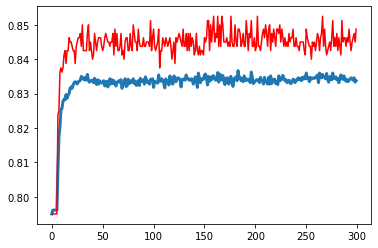

In [31]:
plt.plot(history.history['accuracy'], linewidth=3)
plt.plot(history.history['val_accuracy'], color='red')

In [101]:
# Prediction of X_test
y_pred = classifier.predict(X_test)

In [102]:
# Making them to 0 and 1 instead of probabs
y_pred = (y_pred > 0.5)

In [103]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [104]:
# Generating the confusion matrix

confusion_matrix(y_test, y_pred)

array([[1550,   45],
       [ 266,  139]], dtype=int64)

In [105]:
accuracy = (1551 + 128)/2000

In [106]:
# this is the accuracy of the unseen test set
accuracy

0.8395

In [107]:
classifier

In [108]:
# now what if we want to do a manual input

# create the input matrix similar to X_train
new_input = [[0.0, 0.0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]

In [109]:
# Feature scale it
new_input_scaled = sc.transform(new_input)

In [110]:
new_input_scaled

array([[-0.5698444 , -0.57369368, -0.52111599,  0.91601335,  0.10961719,
        -0.68538967, -0.2569057 ,  0.8095029 ,  0.64259497,  0.9687384 ,
        -0.87203322]])

In [117]:
# Predict using the classifier

answer = classifier.predict(new_input_scaled)
if answer[0][0] > 0.5:
    print('He will leave the ban"k')
else:
    print('He will stay with the bank')
print('Percentage of chance that we will leave the bank is ', answer[0][0]*100 , "%")

He will stay with the bank
Percentage of chance that we will leave the bank is  6.138348951935768 %


In [119]:
# serialize weights to HDF5
classifier.save_weights("modelclass.h5")
print("Saved model to disk")

Saved model to disk


In [120]:
###---------------LATER-----------------
# load weights into new model
classifier.load_weights("modelclass.h5")
print("Loaded model from disk")

Loaded model from disk
